In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("iris2.csv")

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


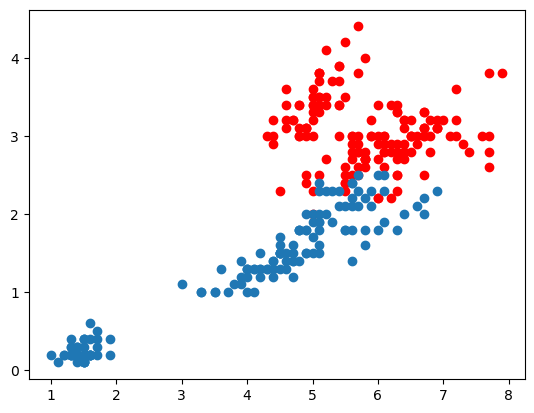

In [6]:
plt.scatter(df.SepalLengthCm, df.SepalWidthCm, color ='red')
plt.scatter(df.PetalLengthCm, df.PetalWidthCm)

In [7]:
df.value_counts

<bound method DataFrame.value_counts of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       I

In [15]:
class MySoftmaxRegression:
    def __init__(self, alfa=0.1, iterations=4000, normalize=True):
        self.alfa = alfa
        self.iterations = iterations
        self.normaliz = normalize
        self.coef_ = None
        self.bias_ = None
        self.cost_history = []

    def softmax(self, Z):
        expz = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expz / np.sum(expz, axis=1, keepdims=True)

    def one_hot(self, y, num_classes):
        out = np.zeros((len(y), num_classes))
        for i in range(len(y)):
            out[i, int(y[i])] = 1
        return out

    def normalize(self, X):
        return (X - X.mean(axis=0)) / X.std(axis=0)

    def cost_function(self, Y_hat, Y):
        Y_hat = np.clip(Y_hat, 1e-10, 1-1e-10)
        return -np.mean(np.sum(Y * np.log(Y_hat), axis=1))

    def fit(self, X, y):
        if self.normaliz:
            X = self.normalize(X)
            
        m, n = X.shape
        num_classes = len(np.unique(y))
        
        Y = self.one_hot(y, num_classes)
        
        self.coef_ = np.zeros((n, num_classes))
        self.bias_ = np.zeros((1, num_classes))
        
        for i in range(self.iterations):
            Z = np.dot(X, self.coef_) + self.bias_
            Y_hat = self.softmax(Z)
            
            loss = self.cost_function(Y_hat, Y)
            self.cost_history.append(loss)

            # gradients
            dW = np.dot(X.T, (Y_hat - Y)) / m
            dB = np.sum(Y_hat - Y, axis=0, keepdims=True) / m
            
            self.coef_ -= self.alfa * dW
            self.bias_ -= self.alfa * dB

    def predict_proba(self, X):
        if self.normaliz:
            X = self.normalize(X)
        Z = np.dot(X, self.coef_) + self.bias_
        return self.softmax(Z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)


In [33]:
df_copy = df.copy() 
label_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
ynum = df_copy["Species"].map(label_map).values
X = df_copy.iloc[:, 1:-1].values
np.random.seed(42)#for not changing the random
indeksi = np.random.permutation(len(X))
train_size = int(len(X) * 0.85)

train_indices = indeksi[:train_size]
test_indices = indeksi[train_size:]

X_train = X[train_indices]
y_train = ynum[train_indices]

X_test = X[test_indices]
y_test = ynum[test_indices]

model = MySoftmaxRegression(alfa=0.1, iterations=4000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(accuracy)

0.8260869565217391


In [41]:
model.coef_

array([[-1.9657324 ,  1.06971334,  0.89601906],
       [ 1.78698801, -0.37644932, -1.41053869],
       [-3.17775882, -0.4820158 ,  3.65977462],
       [-2.99043839, -1.35777782,  4.34821621]])

In [40]:
model.bias_

array([[-0.2827034 ,  3.61526608, -3.33256268]])

In [39]:
predictions

array([2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2])

In [37]:
df_copy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


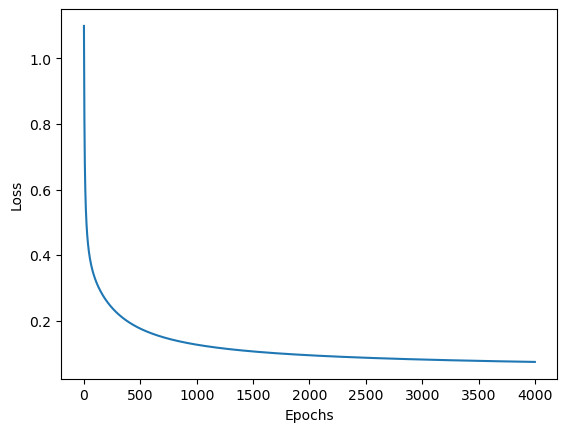

In [42]:
plt.plot(model.cost_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
Copied the Iris dataset and mapped species names to numeric labels.
Split the data into training 85-15 sets using random permutation.
Implemented a MySoftmaxRegression class written bym e
Softmax function for multiclass probabilities
One-hot encoding for labels
Normalization
Cross-entropy loss funciton
Gradient descent for weight and bias 
Trained the model on the training set for 4000 iterations.
Predicted the test set and calculated the accuracy.
Plotted the loss curve to visualize model s learning over epochs.

When we give alpha high value the loss curve is decreasing faster but overshoots 
If low alpha - is good but thats why we need more iterations.
If few iterations underfitting  